In [1]:
import cv2
import numpy as np
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.path as mplPath
import xml.etree.ElementTree as ET
import Util

In [2]:
folderPageImages = 'parzivalDataset'; 
folderGroundThruth = 'groundTruth'
ximg_train = []; ximg_test = []; ximg_validation = [];
ximg_train_superpixels = [];
ximgresized_train = []; ximgresized_test = []; ximgresized_validation = [];
xgt_train = []; xgt_test = []; xgt_validation = [];
x_train = []; y_train = []
x_test = []; y_test = []
x_va = []; y_va = []
x = []; y = []


#### Leyendo las imágenes de los documentos y sus respectivos archivos XML que contienen los segmentos (ground truth) como coordenadas de polígonos


In [3]:
ximg_train,      xgt_train      = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'train')     
ximg_test,       xgt_test       = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'test')
ximg_validation, xgt_validation = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'validation')


####  Reduciendo las imágenes a escala

In [4]:
ximgresized_train = Util.resizeImages(ximg_train, 2**-3)
ximgresized_test = Util.resizeImages(ximg_train, 2**-3)
ximgresized_validation = Util.resizeImages(ximg_train, 2**-3)

index 7 to samples

#### Segmentando las imágenes en super píxeles, usando la técnica de SLIC

In [7]:
ximg_train_superpixels = Util.segmentImageInSuperpixels([ximg_train[7]], 3000)

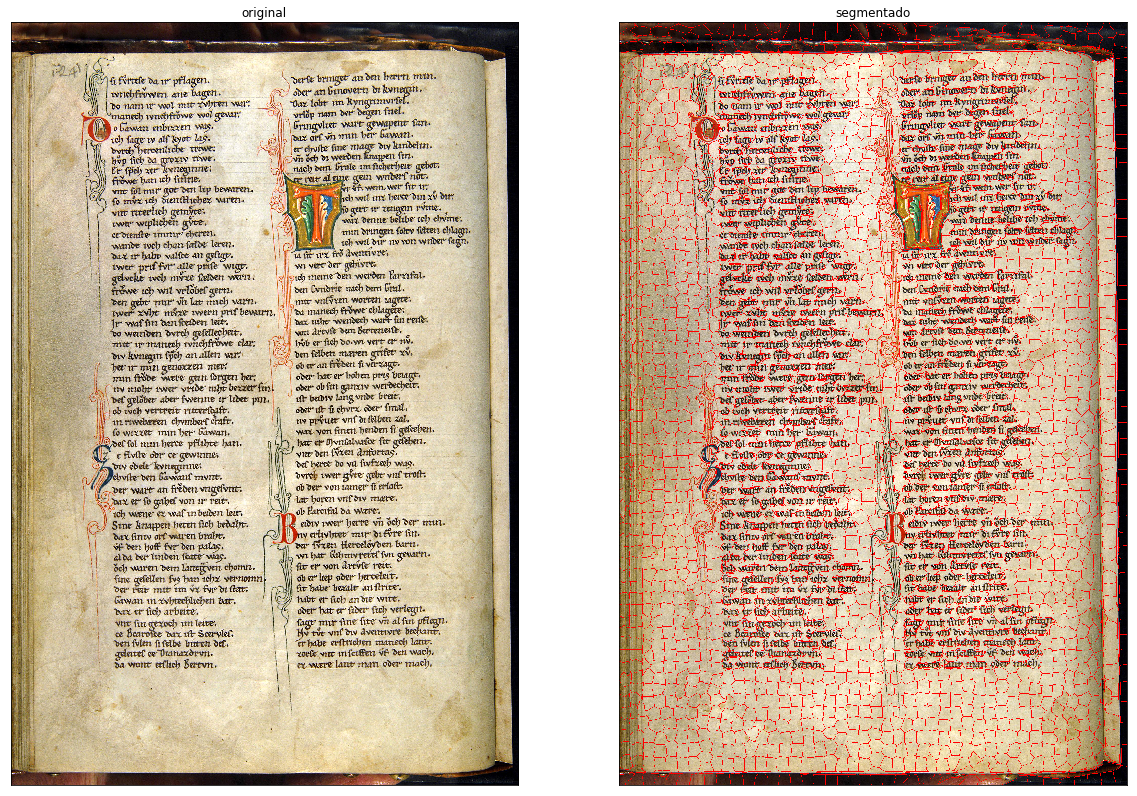

In [13]:
image = ximg_train[7]
imgSegmented = mark_boundaries(image, ximg_train_superpixels[0], color=(1, 0, 0), outline_color=None, mode='outer', background_label=0)
Util.subplot(titles=['original','segmentado'], images = [image, imgSegmented], rows = 1, imgPerRows = 2, size = 20)